# Test Your Software Installation

If this is your first time using a Jupyter notebook, please make sure to follow along with me in the class Video.  If you know what you are doing, just go ahead and run the cells and make sure everything works on your system.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

###  No errors yet? Your software is installed!
If you don't have any errors from running the cell above, then you are set.

# Numpy

Numpy stands for numerical python.  It's giving us a LOT of very special things.
  * linear algebra
  * runs in C (so it's fast)
  * uses special libraries for your CPU to do the linear algebra routines FAST
  * gives us ndarrays -- n-dimensional arrays.
  
Numpy is the basis of machine learning in python.  Without it -- you have nothing. Literally nothing.  Every tool we use will use numpy, keras, tensorflow, pytorch, pymc3, pandas, scikit-learn, scikit-image, every single machine learning library you will ever find in python stands on top of numpy.

So let's see a tiny bit of what it can do

Examples taken from:
https://jakevdp.github.io/PythonDataScienceHandbook/

In [4]:
# Shape, Ndmin

np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [5]:
x1

array([5, 0, 3, 3, 7, 9])

In [6]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [7]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

In [8]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [9]:
print("dtype:", x3.dtype)


dtype: int64


In [10]:
a  = np.arange(1,10)
print(f"The shape is {a.shape}")
print(a)

The shape is (9,)
[1 2 3 4 5 6 7 8 9]


In [11]:
a.shape

(9,)

In [12]:
b = a.reshape(-1,1)

In [13]:
b.shape

(9, 1)

In [14]:
b

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [15]:
# Reshape
grid = np.arange(1, 10,.1).reshape((-1, 10))
print(grid)

[[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
 [2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
 [3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]
 [4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
 [5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9]
 [6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9]
 [7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]
 [8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9]
 [9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]]


In [16]:
grid.shape

(9, 10)

# Numpy uses vectorization

Vectorization, uses Basic Linear Algebra Subroutines (BLAS), notably [strassens algorithm](https://youtu.be/ORrM-aSNZUs), and a bunch of other very cool things


In [18]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output


values = np.random.randint(1, 10, size=5)
print(values)
print(compute_reciprocals(values))


[5 4 8 6 6]
[0.2        0.25       0.125      0.16666667 0.16666667]


In [19]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

4.23 s ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
values

array([5, 4, 8, 6, 6])

In [21]:
values * 10

array([50, 40, 80, 60, 60])

In [22]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.2        0.25       0.125      0.16666667 0.16666667]
[0.2        0.25       0.125      0.16666667 0.16666667]


In [23]:
%timeit (1.0 / big_array)

6.17 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Broadcasting

In [24]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [25]:
a + 5


array([5, 6, 7])

In [26]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [30]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [31]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [32]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

# Let's plot a sine wave with numpy and matplotlib

You can adjust the range of the wave by playing around with the `np.arange()` parameters, the syntax is `(start, stop, step)` just like normal python slicing.  Except with step we can step by decimal amounts.

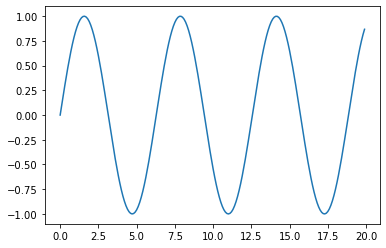

In [33]:
a = np.sin(np.arange(0,20,.1))
x = np.arange(0,20,.1)
plt.plot(x, a);  # we add the semi-colon ; in order to suppress an object output from jupyter -- go ahead and try removing it, you will see!

# We can dress up our plot a bit with extra attributes

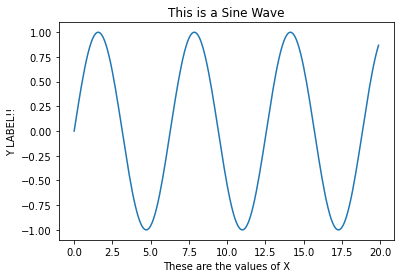

In [34]:
plt.plot(x, a)
plt.title("This is a Sine Wave")
plt.xlabel("These are the values of X")
plt.ylabel("Y LABEL!!");

If we want to control the size of the plot we have to do it _before_ we make the plot, at least that's one way.

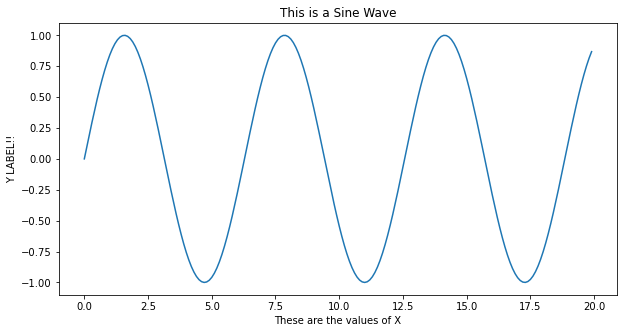

In [35]:
# figsize allows us to control the size of the plot, and we access it through the plots figure object

plt.figure(figsize=(10,5))
plt.plot(x, a)
plt.title("This is a Sine Wave")
plt.xlabel("These are the values of X")
plt.ylabel("Y LABEL!!");

## Finally let's plot a few other things on the same plot.


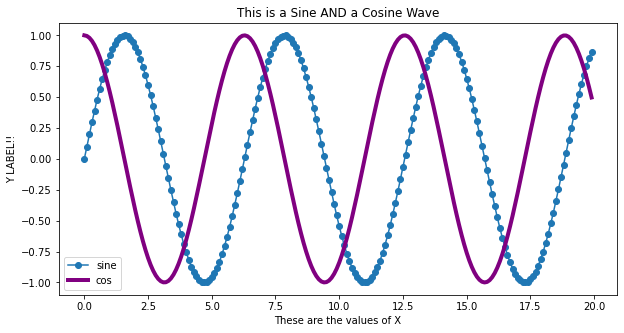

In [36]:
plt.figure(figsize=(10,5))
b = np.cos(np.arange(0,20,.1))
plt.plot(x, a, label = "sine", marker = 'o' ) # add a label so we can create a legend and mess with the marker
plt.plot(x, b, label = 'cos', linewidth = 4, color = 'purple') # add b by simply plotting it as well. , make it thicker and purple
plt.title("This is a Sine AND a Cosine Wave")
plt.xlabel("These are the values of X")
plt.ylabel("Y LABEL!!")
plt.legend();

# Ok, let's load up some data with Scikit-Learn and Pandas
We will use some built-in datasets from Scikit-learn, later on we will learn to load our own data

In [37]:
boston = datasets.load_boston()

In [38]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Push our data into a pandas DataFrame for ease of use

In [39]:
housing = pd.DataFrame(boston.data, columns = boston.feature_names)

In [40]:
# look at the shape of your data, presents as (rows , columns)
housing.shape

(506, 13)

In [41]:
# bottom 5 rows of the dataset
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [42]:
# show the first 5 rows of data by default
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
housing['CRIM'].mean()

3.613523557312254

In [44]:
housing.mean(axis = 0)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [45]:
housing.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

In [46]:
# some basic stats on our numerical data
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Some Indexing

Pandas has slicing built in, the same way python lists work (and numpy arrays).  This is done using the `[]` notation.  Additionally Pandas has some extra tricks with two main types of indexing `.iloc` which is primarily label based, and `.loc` which is primarily integer based.
You can read more [at the official docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [47]:
housing[:3]  # gives first 3 rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [48]:
housing[3:11:2]  #rows 3 through 11, stepping by 2, note the start in inclusive and the end is excluded (like python)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


### `.iloc`
Ok, that works for rows, but as soon as we want columns in pandas we need to switch `.iloc`

In [49]:
housing.iloc[:3,:2] # the first 3 rows and 2 columns -- note the comma ',' which used to tell pandas that we are indexing both rows and columns

,CRIM,ZN
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0


In [50]:
# note we can do the same things we did before with `.iloc` as well
housing.iloc[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


### `.loc`

Here we will use the based indexing.  We can use it to select columns by their string name.  
It's important to note that we will index with `.loc[:4, [strings]]` and that  4 is a label here, it's the index label, which happens to be an integer (it's an integer most of the time)


In [51]:
housing.loc[:4, ['ZN', 'TAX']]

,ZN,TAX
0,18.0,296.0
1,0.0,242.0
2,0.0,242.0
3,0.0,222.0
4,0.0,222.0


### Boolean indexing

So a common thing we may want to do is look for certain rows (or columns) that hold a certain value.  This can be done with boolean indexing easily with pandas.
This is best thought of as a two step process
(1) create a boolean _mask_ 
(2) use your mask to _index_ your dataframe.

Let's answer the question "Show me the rows where the age of the home is greater than 65"

In [52]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
# step one, create the mask.
mask = housing['AGE']>65
mask

0       True
1       True
2      False
3      False
4      False
       ...  
501     True
502     True
503     True
504     True
505     True
Name: AGE, Length: 506, dtype: bool

In [54]:
# Now I can use my boolean mask to index on the dataframe.  This is obviously a bit more complicated under the hood -- but it works fabulously.
housing[mask]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [55]:
# You will commonly see this pattern show up like this
housing[housing['AGE']>65]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# A pandas Series is like a DataFrame, but for a single column

All the same rules apply, plus there are a few neat inbuilt functions that are available only on Series, but they are mostly the same

In [56]:
housing_targets = pd.Series(boston.target)

In [57]:
housing_targets

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

# Finally, let's load at some data we can "look" at

In [58]:
digits = datasets.load_digits()

In [59]:
digits.data[0].shape  # shape tells us the dimension of our data, it's a 1D vector with 64 rows.

(64,)

In [60]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

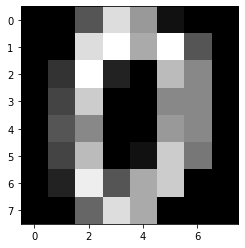

In [61]:
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')  #we reshaped it into an 8,8 in order to plot it.

In [62]:
digits.data.shape  #we have 1797 samples, each one is a vector of 64 rows.  In this case we have 1797 rows, each row is a row vector of length 64.

(1797, 64)

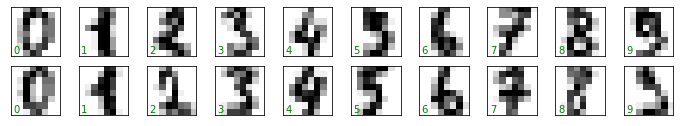

In [64]:
fig, axes = plt.subplots(2, 10, figsize=(12, 2))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.data[i].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])